In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
dataset = pd.read_csv('Advertising.csv')

In [10]:
dataset.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
x = dataset.drop('sales', 1)
y = dataset['sales']

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
dataset_std = StandardScaler().fit_transform(dataset)

In [15]:
dataset_cov_matrix = np.cov(dataset_std.T)
dataset_cov_matrix

array([[ 1.00502513,  0.01780371, -0.11123662, -0.15572276, -0.05187563],
       [ 0.01780371,  1.00502513,  0.05508408,  0.05693254,  0.7861552 ],
       [-0.11123662,  0.05508408,  1.00502513,  0.35588317,  0.57911817],
       [-0.15572276,  0.05693254,  0.35588317,  1.00502513,  0.22944626],
       [-0.05187563,  0.7861552 ,  0.57911817,  0.22944626,  1.00502513]])

In [16]:
eig_vals, eig_vecs = np.linalg.eig(dataset_cov_matrix)

print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.11244231 -0.50153699  0.84956052 -0.11851167  0.00439114]
 [ 0.4901655  -0.52906732 -0.28314993 -0.27690967 -0.56830688]
 [ 0.46937246  0.37059487  0.36474682  0.58594369 -0.40740482]
 [ 0.32011576  0.5328772   0.25350752 -0.74100181  0.01476616]
 [ 0.65139075 -0.21737007 -0.02768997  0.12985503  0.71471063]]


In [17]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[2.13560712 1.24897121 0.90655682 0.6797735  0.05421698]


In [18]:
### Calculating cumulative variance to select number of components
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
print("Variance captured by each component \n", var_exp)

Variance captured by each component 
 [42.49858171671858, 24.854526999942365, 18.040480785004302, 13.527492638305766, 1.078917860028978]


In [19]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative variance captured with each component \n", cum_var_exp)

Cumulative variance captured with each component 
 [ 42.49858172  67.35310872  85.3935895   98.92108214 100.        ]


In [21]:
from sklearn.decomposition import PCA
pca = PCA().fit(dataset_std)

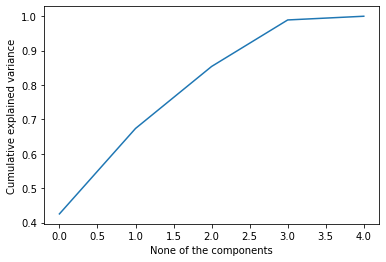

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('None of the components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [23]:
pca = PCA(n_components = 2)

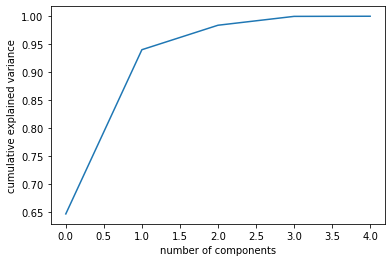

In [27]:
pca = PCA().fit(dataset)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show();

In [ ]:
pcs = pca.fit_transform(dataset_std)